In [55]:
import torch
from IPython import display
import numpy as np
import random

In [56]:
# config
input_size = 10
example_size = 5000
w_vector = [114.0,514.0,114.,514.,114.,514.,114.,514.,114.,514.]
b_vector = 520.1314
sample_feature = torch.randn(example_size,input_size,dtype=float)
sample_labels=0
for i in range(10):
    sample_labels+= w_vector[i]*sample_feature[:,i]
sample_labels += b_vector
sample_labels += torch.tensor(np.random.normal(loc=0.0,scale=1,size=(example_size)),dtype=float)
print(sample_feature[0],sample_labels[0])



tensor([-0.5125,  1.5412, -0.3073, -0.3965,  1.5238, -1.6533,  0.9479,  0.9176,
         0.0347, -0.1898], dtype=torch.float64) tensor(823.6708, dtype=torch.float64)


torch.Size([5000]) torch.Size([5000])



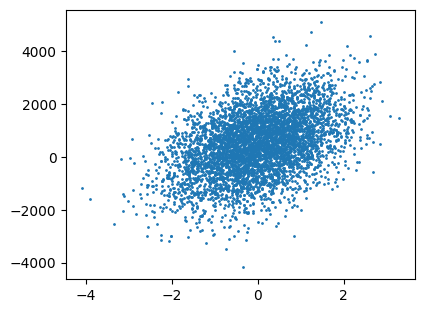

In [57]:
import matplotlib.pyplot as plt 
def display_with_svg():
    display.display_svg()
    return
def set_fig_size(figure_size=(4.5,3.5)):
    display_with_svg()
    plt.rcParams['figure.figsize']=figure_size

set_fig_size()
print(sample_feature[:,1].shape,sample_labels.shape)
print()
plt.scatter(sample_feature[:,1].numpy(),sample_labels.numpy(),1)




In [58]:
import random
def data_iter(batch_size,features,labels):
    size = len(features)
    indices = list(range(size))
    random.shuffle(indices)
    for i in range(0,size,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,size)])
        yield features.index_select(0,j),labels.index_select(0,j)
batch_size=100
for x,y in data_iter(batch_size,sample_feature,sample_labels):
    print(x)
    print()
    print(y)
    break




tensor([[-3.3861e-01, -1.2811e+00,  1.0776e+00,  7.4634e-01,  1.8237e+00,
          2.0973e+00,  8.3455e-01, -9.0216e-02,  1.5633e+00, -1.4767e+00],
        [-1.2994e+00,  3.3679e-01, -4.9900e-01, -2.1600e+00,  4.4356e-01,
         -1.1472e+00,  8.3463e-01,  6.1473e-01, -2.4883e-01, -1.3728e-01],
        [-1.4608e+00, -1.6911e+00,  6.6071e-01,  7.8311e-01, -4.8178e-01,
         -4.9074e-01,  1.9003e-01, -5.6349e-01, -9.4441e-01, -5.8196e-01],
        [-8.5838e-01,  1.1349e+00, -2.5072e-01,  2.9570e-01, -9.6499e-01,
         -1.9149e+00, -1.3735e+00, -6.1983e-01, -3.2807e-01, -3.7486e-01],
        [-6.3093e-01,  2.0912e-01,  3.3285e-03,  2.4404e+00,  2.2873e-01,
          1.1046e+00, -7.0475e-01, -1.0540e+00,  5.0171e-01, -1.5839e+00],
        [ 1.5632e+00,  2.4176e-01,  4.0373e-01,  1.4878e-01,  3.8730e-01,
          5.8209e-02,  1.5137e+00, -6.2852e-02, -1.9145e+00, -1.8404e-01],
        [ 1.5084e+00,  1.6823e-01,  1.4532e+00, -3.8397e-02, -6.2868e-01,
         -9.5950e-01,  1.0656e+0

In [59]:
w = torch.tensor(np.random.normal(0, 0.01, (input_size, 1)), dtype=torch.float64,requires_grad=True)
b = torch.zeros(1, dtype=torch.float64,requires_grad=True)
def line_model(x,w,b):
    return torch.mm(x,w)+b
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size
lr = 0.03
num_epochs = 300
net = line_model
loss = squared_loss
for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, sample_feature, sample_labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        train_l = loss(net(sample_feature, w, b), sample_labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 764117.152812
epoch 1, loss 703640.362323
epoch 1, loss 670138.250598
epoch 1, loss 640355.761701
epoch 1, loss 595730.382129
epoch 1, loss 551945.899598
epoch 1, loss 521701.557128
epoch 1, loss 497350.262083
epoch 1, loss 466451.564475
epoch 1, loss 441219.492630
epoch 1, loss 417715.985802
epoch 1, loss 396232.976931
epoch 1, loss 373195.758486
epoch 1, loss 354105.345884
epoch 1, loss 332029.823365
epoch 1, loss 313599.989685
epoch 1, loss 292714.309471
epoch 1, loss 275341.240762
epoch 1, loss 258752.596816
epoch 1, loss 242146.419353
epoch 1, loss 228063.167842
epoch 1, loss 215324.017282
epoch 1, loss 203549.338539
epoch 1, loss 191687.150034
epoch 1, loss 182060.813731
epoch 1, loss 171661.061993
epoch 1, loss 163181.182841
epoch 1, loss 152930.010033
epoch 1, loss 142555.001411
epoch 1, loss 132290.923528
epoch 1, loss 125525.506055
epoch 1, loss 118336.035108
epoch 1, loss 110671.040827
epoch 1, loss 103784.080602
epoch 1, loss 98034.406385
epoch 1, loss 91191.9

In [60]:
print(w_vector, '\n', w)
print(b_vector, '\n', b)

[114.0, 514.0, 114.0, 514.0, 114.0, 514.0, 114.0, 514.0, 114.0, 514.0] 
 tensor([[113.9887],
        [514.0038],
        [114.0046],
        [513.9857],
        [114.0036],
        [514.0092],
        [114.0072],
        [514.0158],
        [113.9947],
        [513.9872]], dtype=torch.float64, requires_grad=True)
520.1314 
 tensor([520.1030], dtype=torch.float64, requires_grad=True)
